In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.manifold import TSNE

In [2]:
train= pd.read_excel('/kaggle/input/Tweetsdata_Beer.xlsx')

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [3]:
train.head()

,ScreenName,Createdat,country,retweetcount,FavoriteCount,TweetHistoryid,Keyword,TweetFulltext
0,1970sBOY,2019-05-27 19:45:49,"Brentwood, Essex, UK",0,0,155756248,Beer,Drinking @ButcombeBrewery Bitter or @MolesBrew...
1,1gastronomy,2019-04-21 17:47:46,Switzerland,0,0,116790821,#Beer,#Catholic #easter2019 #sunday with #pastrami #...
2,1gastronomy,2019-08-08 21:24:17,Switzerland,0,0,138235306,#Beer,#fixbeer #fixtime #fix #beer #greekbeer @fixbe...
3,80breakfasts,2019-08-30 21:25:46,"Manila, Philippines",0,2,155581245,Beer,Won’t win any beauty contests but those aren’t...
4,AdieHush,2019-01-12 15:25:08,NaN,1,1,100955787,Beer,RT @wipeoutfusion: @AdieHush ..but a different...


In [4]:
df=train[train['TweetFulltext'].str.contains("ABV|abv")==True]


In [5]:
df

,ScreenName,Createdat,country,retweetcount,FavoriteCount,TweetHistoryid,Keyword,TweetFulltext
161,AliceLascelles,2019-05-16 05:03:28,NaN,2,5,121102478,Beers,Haven’t touched a drop for five days due to ba...
162,AliceLascelles,2019-06-04 01:00:35,NaN,1,1,125538193,Beer,Not a fan of ‘flavoured’ beers in general but ...
198,AliceLascelles,2019-06-04 01:00:35,NaN,1,1,125538193,Beers,Not a fan of ‘flavoured’ beers in general but ...
213,AliceLascelles,2019-01-11 02:05:07,NaN,1,2,100816266,Beer,This &lt;0.5%abv ‘Negroni Sbagliato’ from @squ...
261,ATJbeer,2019-07-11 13:43:53,"Exeter, England",0,0,134515910,Beer,RT @imbibeuk: Where is the #craftbeer market i...
315,beerbabe,2019-03-23 00:55:43,"Portland, ME",3,92,112112732,Beers,#8 Old Brewery Tadcaster - Samuel Smith's Impe...
362,BeerScribe,2019-06-12 22:29:26,"Our Fair City, Mass.",3,31,127024358,Beers,A brewery serving all its beers at 5.7% to 6.1...
431,agladman,2019-05-21 14:27:22,South East London,0,0,155759359,Beers,And @MikkellerBeer have started doing lots of ...
701,ATJbeer,2019-07-11 15:33:19,"Exeter, England",1,0,134686327,Beer,Where is the #craftbeer market headed? @ATJbee...
894,beerbabe,2019-03-25 05:51:32,"Portland, ME",0,1,112416005,Beers,@BellsBrewery @foundersbrewing Worth noting th...


In [6]:
x=[]

In [7]:
import re

In [8]:
y=[]

In [9]:
for i in x:
    print(i)
    for d in i:
        print(d)
        f.append([d for d in re.findall(r'\d+(?:\.\d+)?', d)])
        print(f)

In [10]:
def s(x):
    f=[]
    for i in x:
        print(i)
        f.append([i for i in re.findall(r'\d+(?:\.\d+)?', i)])
    return f

In [11]:
s(['12e','13r'])

12e
13r


[['12'], ['13']]

In [12]:
df['percentages']=df['percentages'].apply(s)

KeyError: 'percentages'

In [13]:
df.drop(['percentages'],axis=1)

KeyError: "['percentages'] not found in axis"

In [14]:
df['same']='percentages'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df.drop(['same'],axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
df

,ScreenName,Createdat,country,retweetcount,FavoriteCount,TweetHistoryid,Keyword,TweetFulltext
161,AliceLascelles,2019-05-16 05:03:28,NaN,2,5,121102478,Beers,Haven’t touched a drop for five days due to ba...
162,AliceLascelles,2019-06-04 01:00:35,NaN,1,1,125538193,Beer,Not a fan of ‘flavoured’ beers in general but ...
198,AliceLascelles,2019-06-04 01:00:35,NaN,1,1,125538193,Beers,Not a fan of ‘flavoured’ beers in general but ...
213,AliceLascelles,2019-01-11 02:05:07,NaN,1,2,100816266,Beer,This &lt;0.5%abv ‘Negroni Sbagliato’ from @squ...
261,ATJbeer,2019-07-11 13:43:53,"Exeter, England",0,0,134515910,Beer,RT @imbibeuk: Where is the #craftbeer market i...
315,beerbabe,2019-03-23 00:55:43,"Portland, ME",3,92,112112732,Beers,#8 Old Brewery Tadcaster - Samuel Smith's Impe...
362,BeerScribe,2019-06-12 22:29:26,"Our Fair City, Mass.",3,31,127024358,Beers,A brewery serving all its beers at 5.7% to 6.1...
431,agladman,2019-05-21 14:27:22,South East London,0,0,155759359,Beers,And @MikkellerBeer have started doing lots of ...
701,ATJbeer,2019-07-11 15:33:19,"Exeter, England",1,0,134686327,Beer,Where is the #craftbeer market headed? @ATJbee...
894,beerbabe,2019-03-25 05:51:32,"Portland, ME",0,1,112416005,Beers,@BellsBrewery @foundersbrewing Worth noting th...


In [17]:
train.shape

(16632, 8)

In [18]:
df2=pd.concat([train,df])

In [19]:
df2.to_csv('Updated_Beer_Data_ABV.csv')

In [20]:
x=[]

In [21]:
for i in df['TweetFulltext']:
    x.append([i for i in i.split() if '%' in i])

    

In [22]:
x

[['2.5%abv'],
 ['2.5%'],
 ['2.5%'],
 ['&lt;0.5%abv'],
 [],
 ['7%?'],
 ['5.7%', '6.1%'],
 ['0%'],
 [],
 ['10%,', '10.5%', '8.3%'],
 ['40%', '4%'],
 ['8%,'],
 ['(3.4%).'],
 [],
 [],
 ['(5%'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['10%'],
 [],
 [],
 ['10%'],
 ['5%'],
 ['10%'],
 [],
 ['10%'],
 [],
 [],
 ['7%'],
 [],
 [],
 [],
 ['4.5%'],
 ['7%'],
 [],
 ['4%'],
 ['17%'],
 ['17%'],
 [],
 [],
 [],
 [],
 ['8%,'],
 ['(32%ABV).'],
 [],
 [],
 [],
 [],
 ['7%'],
 ['4%'],
 ['0.5%'],
 [],
 [],
 [],
 [],
 ['(3.4%).'],
 ['8.0%'],
 [],
 ['5%,'],
 [],
 [],
 [],
 [],
 ['8%,'],
 ['6%', '1.5%', '2.5%?'],
 [],
 ['1.2%', '2.8%'],
 [],
 ['4.4%'],
 [],
 [],
 [],
 [],
 [],
 ['6%'],
 [],
 ['4%'],
 [],
 [],
 ['8%,'],
 ['5%'],
 ['3.4%?'],
 ['3.5%'],
 [],
 [],
 ['0.3%'],
 [],
 [],
 ['6%', '1.5%', '2.5%?'],
 [],
 [],
 ['9%'],
 ['13%abv.'],
 [],
 ['4.5%'],
 [],
 ['(32%ABV),'],
 ['12.5%abv'],
 ['0.5%'],
 [],
 ['5%.'],
 ['abv%'],
 ['6.5%abv'],
 [],
 [],
 ['6.8%'],
 [],
 ['3.3%', '3.4%.'],
 ['13%'],
 ['3.5%'

In [23]:
f=[]

In [24]:
for i in x:
    f=[]
    for d in i:
        f.append([s for d in re.findall("\d+\.\d+", s)])
        print(f)

TypeError: expected string or bytes-like object

In [25]:
f

[]

In [26]:
for i in x:
    for i in i:
        print([s for s in i if s.isdigit()])

['2', '5']
['2', '5']
['2', '5']
['0', '5']
['7']
['5', '7']
['6', '1']
['0']
['1', '0']
['1', '0', '5']
['8', '3']
['4', '0']
['4']
['8']
['3', '4']
['5']
['1', '0']
['1', '0']
['5']
['1', '0']
['1', '0']
['7']
['4', '5']
['7']
['4']
['1', '7']
['1', '7']
['8']
['3', '2']
['7']
['4']
['0', '5']
['3', '4']
['8', '0']
['5']
['8']
['6']
['1', '5']
['2', '5']
['1', '2']
['2', '8']
['4', '4']
['6']
['4']
['8']
['5']
['3', '4']
['3', '5']
['0', '3']
['6']
['1', '5']
['2', '5']
['9']
['1', '3']
['4', '5']
['3', '2']
['1', '2', '5']
['0', '5']
['5']
[]
['6', '5']
['6', '8']
['3', '3']
['3', '4']
['1', '3']
['3', '5']
['3', '4']
['3', '5']
['5']
['6', '5']
['1', '4']
['0', '5']
['6', '8']
['5']


In [27]:
x=np.array(x)
x=pd.DataFrame(x)

In [28]:
y=np.array(y)
y=pd.DataFrame(y)

In [29]:
len(x)

139

In [30]:
df['percentages']=x.values

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
df.percentages.str.match(r'\d+(?:\.\d+)+$')


161     NaN
162     NaN
198     NaN
213     NaN
261     NaN
         ..
15697   NaN
15745   NaN
16206   NaN
16274   NaN
16275   NaN
Name: percentages, Length: 139, dtype: float64

In [32]:
df

,ScreenName,Createdat,country,retweetcount,FavoriteCount,TweetHistoryid,Keyword,TweetFulltext,percentages
161,AliceLascelles,2019-05-16 05:03:28,NaN,2,5,121102478,Beers,Haven’t touched a drop for five days due to ba...,[2.5%abv]
162,AliceLascelles,2019-06-04 01:00:35,NaN,1,1,125538193,Beer,Not a fan of ‘flavoured’ beers in general but ...,[2.5%]
198,AliceLascelles,2019-06-04 01:00:35,NaN,1,1,125538193,Beers,Not a fan of ‘flavoured’ beers in general but ...,[2.5%]
213,AliceLascelles,2019-01-11 02:05:07,NaN,1,2,100816266,Beer,This &lt;0.5%abv ‘Negroni Sbagliato’ from @squ...,[&lt;0.5%abv]
261,ATJbeer,2019-07-11 13:43:53,"Exeter, England",0,0,134515910,Beer,RT @imbibeuk: Where is the #craftbeer market i...,[]
315,beerbabe,2019-03-23 00:55:43,"Portland, ME",3,92,112112732,Beers,#8 Old Brewery Tadcaster - Samuel Smith's Impe...,[7%?]
362,BeerScribe,2019-06-12 22:29:26,"Our Fair City, Mass.",3,31,127024358,Beers,A brewery serving all its beers at 5.7% to 6.1...,"[5.7%, 6.1%]"
431,agladman,2019-05-21 14:27:22,South East London,0,0,155759359,Beers,And @MikkellerBeer have started doing lots of ...,[0%]
701,ATJbeer,2019-07-11 15:33:19,"Exeter, England",1,0,134686327,Beer,Where is the #craftbeer market headed? @ATJbee...,[]
894,beerbabe,2019-03-25 05:51:32,"Portland, ME",0,1,112416005,Beers,@BellsBrewery @foundersbrewing Worth noting th...,"[10%,, 10.5%, 8.3%]"


In [33]:
def f

SyntaxError: invalid syntax (<ipython-input-33-dceb05d1f47c>, line 1)

In [34]:
for i in df['TweetFulltext']:
    df['Percentages']=pd.Series([[i for i in i.split() if '%' in i]])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
df

,ScreenName,Createdat,country,retweetcount,FavoriteCount,TweetHistoryid,Keyword,TweetFulltext,percentages,Percentages
161,AliceLascelles,2019-05-16 05:03:28,NaN,2,5,121102478,Beers,Haven’t touched a drop for five days due to ba...,[2.5%abv],NaN
162,AliceLascelles,2019-06-04 01:00:35,NaN,1,1,125538193,Beer,Not a fan of ‘flavoured’ beers in general but ...,[2.5%],NaN
198,AliceLascelles,2019-06-04 01:00:35,NaN,1,1,125538193,Beers,Not a fan of ‘flavoured’ beers in general but ...,[2.5%],NaN
213,AliceLascelles,2019-01-11 02:05:07,NaN,1,2,100816266,Beer,This &lt;0.5%abv ‘Negroni Sbagliato’ from @squ...,[&lt;0.5%abv],NaN
261,ATJbeer,2019-07-11 13:43:53,"Exeter, England",0,0,134515910,Beer,RT @imbibeuk: Where is the #craftbeer market i...,[],NaN
315,beerbabe,2019-03-23 00:55:43,"Portland, ME",3,92,112112732,Beers,#8 Old Brewery Tadcaster - Samuel Smith's Impe...,[7%?],NaN
362,BeerScribe,2019-06-12 22:29:26,"Our Fair City, Mass.",3,31,127024358,Beers,A brewery serving all its beers at 5.7% to 6.1...,"[5.7%, 6.1%]",NaN
431,agladman,2019-05-21 14:27:22,South East London,0,0,155759359,Beers,And @MikkellerBeer have started doing lots of ...,[0%],NaN
701,ATJbeer,2019-07-11 15:33:19,"Exeter, England",1,0,134686327,Beer,Where is the #craftbeer market headed? @ATJbee...,[],NaN
894,beerbabe,2019-03-25 05:51:32,"Portland, ME",0,1,112416005,Beers,@BellsBrewery @foundersbrewing Worth noting th...,"[10%,, 10.5%, 8.3%]",NaN


In [36]:
for i in df['TweetFulltext']:
    if '%' in i:
           df['Percentages']=[i for i in i.split() if '%' in i]
    else:
        print(False)

ValueError: Length of values does not match length of index

In [37]:
for i in df['TweetFulltext']:
    for i in i.split():
        if '%' in i:
            print(i)

2.5%abv
2.5%
2.5%
&lt;0.5%abv
7%?
5.7%
6.1%
0%
10%,
10.5%
8.3%
40%
4%
8%,
(3.4%).
(5%
10%
10%
5%
10%
10%
7%
4.5%
7%
4%
17%
17%
8%,
(32%ABV).
7%
4%
0.5%
(3.4%).
8.0%
5%,
8%,
6%
1.5%
2.5%?
1.2%
2.8%
4.4%
6%
4%
8%,
5%
3.4%?
3.5%
0.3%
6%
1.5%
2.5%?
9%
13%abv.
4.5%
(32%ABV),
12.5%abv
0.5%
5%.
abv%
6.5%abv
6.8%
3.3%
3.4%.
13%
3.5%
3.4%
3.5%
5%
6.5%abv
14%
0.5%
6.8%,
5%.


In [38]:
df

,ScreenName,Createdat,country,retweetcount,FavoriteCount,TweetHistoryid,Keyword,TweetFulltext,percentages,Percentages
161,AliceLascelles,2019-05-16 05:03:28,NaN,2,5,121102478,Beers,Haven’t touched a drop for five days due to ba...,[2.5%abv],NaN
162,AliceLascelles,2019-06-04 01:00:35,NaN,1,1,125538193,Beer,Not a fan of ‘flavoured’ beers in general but ...,[2.5%],NaN
198,AliceLascelles,2019-06-04 01:00:35,NaN,1,1,125538193,Beers,Not a fan of ‘flavoured’ beers in general but ...,[2.5%],NaN
213,AliceLascelles,2019-01-11 02:05:07,NaN,1,2,100816266,Beer,This &lt;0.5%abv ‘Negroni Sbagliato’ from @squ...,[&lt;0.5%abv],NaN
261,ATJbeer,2019-07-11 13:43:53,"Exeter, England",0,0,134515910,Beer,RT @imbibeuk: Where is the #craftbeer market i...,[],NaN
315,beerbabe,2019-03-23 00:55:43,"Portland, ME",3,92,112112732,Beers,#8 Old Brewery Tadcaster - Samuel Smith's Impe...,[7%?],NaN
362,BeerScribe,2019-06-12 22:29:26,"Our Fair City, Mass.",3,31,127024358,Beers,A brewery serving all its beers at 5.7% to 6.1...,"[5.7%, 6.1%]",NaN
431,agladman,2019-05-21 14:27:22,South East London,0,0,155759359,Beers,And @MikkellerBeer have started doing lots of ...,[0%],NaN
701,ATJbeer,2019-07-11 15:33:19,"Exeter, England",1,0,134686327,Beer,Where is the #craftbeer market headed? @ATJbee...,[],NaN
894,beerbabe,2019-03-25 05:51:32,"Portland, ME",0,1,112416005,Beers,@BellsBrewery @foundersbrewing Worth noting th...,"[10%,, 10.5%, 8.3%]",NaN


In [39]:
train.shape

(16632, 8)

In [40]:
train.isnull().sum()

ScreenName          0
Createdat           0
country           704
retweetcount        0
FavoriteCount       0
TweetHistoryid      0
Keyword             0
TweetFulltext       1
dtype: int64

In [41]:
train.dropna(inplace=True)

In [42]:
train.shape

(15927, 8)

In [43]:
for i in train:
    print(i)

ScreenName
Createdat
country
retweetcount
FavoriteCount
TweetHistoryid
Keyword
TweetFulltext


In [44]:
for i in train:
    print(pd.unique(train[i]).shape)

(771,)
(15141,)
(537,)
(169,)
(191,)
(15189,)
(4,)
(14566,)


In [45]:
pd.unique(train['Keyword'])

array(['Beer', '#Beer', 'Beers', '#Beers'], dtype=object)

In [46]:
train.dtypes

ScreenName                object
Createdat         datetime64[ns]
country                   object
retweetcount               int64
FavoriteCount              int64
TweetHistoryid             int64
Keyword                   object
TweetFulltext             object
dtype: object

In [47]:
train['Createdat'].dt.weekday_name

0          Monday
1          Sunday
2        Thursday
3          Friday
6        Thursday
           ...   
16627    Thursday
16628     Tuesday
16629    Thursday
16630    Thursday
16631    Thursday
Name: Createdat, Length: 15927, dtype: object

In [48]:
train['Hour']=train['Createdat'].dt.hour

In [49]:
train['Month']=train['Createdat'].dt.month

In [50]:
train['Day']=train['Createdat'].dt.weekday_name

In [51]:
train.head()

,ScreenName,Createdat,country,retweetcount,FavoriteCount,TweetHistoryid,Keyword,TweetFulltext,Hour,Month,Day
0,1970sBOY,2019-05-27 19:45:49,"Brentwood, Essex, UK",0,0,155756248,Beer,Drinking @ButcombeBrewery Bitter or @MolesBrew...,19,5,Monday
1,1gastronomy,2019-04-21 17:47:46,Switzerland,0,0,116790821,#Beer,#Catholic #easter2019 #sunday with #pastrami #...,17,4,Sunday
2,1gastronomy,2019-08-08 21:24:17,Switzerland,0,0,138235306,#Beer,#fixbeer #fixtime #fix #beer #greekbeer @fixbe...,21,8,Thursday
3,80breakfasts,2019-08-30 21:25:46,"Manila, Philippines",0,2,155581245,Beer,Won’t win any beauty contests but those aren’t...,21,8,Friday
6,agladman,2019-04-11 22:11:14,South East London,0,0,155758898,Beer,@Shinybiscuit So far I've only had beer for te...,22,4,Thursday


In [52]:
train.drop('Createdat',inplace=True,axis=1)

In [53]:
train.head()

,ScreenName,country,retweetcount,FavoriteCount,TweetHistoryid,Keyword,TweetFulltext,Hour,Month,Day
0,1970sBOY,"Brentwood, Essex, UK",0,0,155756248,Beer,Drinking @ButcombeBrewery Bitter or @MolesBrew...,19,5,Monday
1,1gastronomy,Switzerland,0,0,116790821,#Beer,#Catholic #easter2019 #sunday with #pastrami #...,17,4,Sunday
2,1gastronomy,Switzerland,0,0,138235306,#Beer,#fixbeer #fixtime #fix #beer #greekbeer @fixbe...,21,8,Thursday
3,80breakfasts,"Manila, Philippines",0,2,155581245,Beer,Won’t win any beauty contests but those aren’t...,21,8,Friday
6,agladman,South East London,0,0,155758898,Beer,@Shinybiscuit So far I've only had beer for te...,22,4,Thursday


In [54]:
for i in train:
    print(pd.unique(train[i]).shape)

(771,)
(537,)
(169,)
(191,)
(15189,)
(4,)
(14566,)
(24,)
(9,)
(7,)


In [55]:
train.groupby(['Day','Hour','Month','ScreenName','country']).count()

retweetcount  \
Day       Hour Month ScreenName      country                                 
Friday    0    1     RogerProtzBeer  St Albans, UK                       1   
                     lewbryson       Philadelphia suburbs                1   
               2     Brookston       SF Bay Area, California             1   
                     beerbabe        Portland, ME                        1   
                     dishanddelite   Johannesburg                        1   
...                                                                    ...   
Wednesday 23   7     RogueAles       Newport, Oregon                     1   
                     chefbillyparisi Chicago                             1   
               8     Beervana        Portland, Oregon                    1   
                     allthebrews     Ann Arbor, Mich.                    1   
                     beerbabe        Portland, ME                        1   

                                                              FavoriteCount  \
Day       Hour Month ScreenName      country                                  
Friday    0    1     RogerProtzBeer  St Albans, UK                        1   
                     lewbryson       Philadelphia suburbs                 1   
               2     Brookston       SF Bay Area, California              1   
                     beerbabe        Portland, ME                         1   
                     dishanddelite   Johannesburg                         1   
...                                                                     ...   
Wednesday 23   7     RogueAles       Newport, Oregon                      1   
                     chefbillyparisi Chicago                              1   
               8     Beervana        Portland, Oregon                     1   
                     allthebrews     Ann Arbor, Mich.                     1   
                     beerbabe        Portland, ME                         1   

                                                              TweetHistoryid  \
Day       Hour Month ScreenName      country                                   
Friday    0    1     RogerProtzBeer  St Albans, UK                         1   
                     lewbryson       Philadelphia suburbs                  1   
               2     Brookston       SF Bay Area, California               1   
                     beerbabe        Portland, ME                          1   
                     dishanddelite   Johannesburg                          1   
...                                                                      ...   
Wednesday 23   7     RogueAles       Newport, Oregon                       1   
                     chefbillyparisi Chicago                               1   
               8     Beervana        Portland, Oregon                      1   
                     allthebrews     Ann Arbor, Mich.                      1   
                     beerbabe        Portland, ME                          1   

                                                              Keyword  \
Day       Hour Month ScreenName      country                            
Friday    0    1     RogerProtzBeer  St Albans, UK                  1   
                     lewbryson       Philadelphia suburbs           1   
               2     Brookston       SF Bay Area, California        1   
                     beerbabe        Portland, ME                   1   
                     dishanddelite   Johannesburg                   1   
...                                                               ...   
Wednesday 23   7     RogueAles       Newport, Oregon                1   
                     chefbillyparisi Chicago                        1   
               8     Beervana        Portland, Oregon               1   
                     allthebrews     Ann Arbor, Mich.               1   
                     beerbabe        Portland, ME                   1   

                            

In [56]:
train.groupby(['ScreenName','country']).count()

,,retweetcount,FavoriteCount,TweetHistoryid,Keyword,TweetFulltext,Hour,Month,Day
ScreenName,country,,,,,,,,
1970sBOY,"Brentwood, Essex, UK",30,30,30,30,30,30,30,30
1gastronomy,Switzerland,36,36,36,36,36,36,36,36
2Travelaholics,DC,6,6,6,6,6,6,6,6
2smaki,"Warsaw, Poland",1,1,1,1,1,1,1,1
80breakfasts,"Manila, Philippines",1,1,1,1,1,1,1,1
ABCWineShannonM,"Brandon, Florida",2,2,2,2,2,2,2,2
ADInnocenzio,New York City,4,4,4,4,4,4,4,4
AMummyToo,Nottingham and South London,3,3,3,3,3,3,3,3
ATJbeer,"Exeter, England",561,561,561,561,561,561,561,561


In [57]:
train.groupby(['country']).count().sort_values(by='ScreenName',ascending=False)

,ScreenName,retweetcount,FavoriteCount,TweetHistoryid,Keyword,TweetFulltext,Hour,Month,Day
country,,,,,,,,,
London,1186,1186,1186,1186,1186,1186,1186,1186,1186
"SF Bay Area, California",896,896,896,896,896,896,896,896,896
"Exeter, England",561,561,561,561,561,561,561,561,561
"Chicago, IL",530,530,530,530,530,530,530,530,530
"St Albans, UK",497,497,497,497,497,497,497,497,497
"Portland, ME",440,440,440,440,440,440,440,440,440
"Portland, Oregon",428,428,428,428,428,428,428,428,428
"London, UK",364,364,364,364,364,364,364,364,364
Kansas City,339,339,339,339,339,339,339,339,339


In [58]:
train.groupby(['Day']).count()

,ScreenName,country,retweetcount,FavoriteCount,TweetHistoryid,Keyword,TweetFulltext,Hour,Month
Day,,,,,,,,,
Friday,2759,2759,2759,2759,2759,2759,2759,2759,2759
Monday,1960,1960,1960,1960,1960,1960,1960,1960,1960
Saturday,2131,2131,2131,2131,2131,2131,2131,2131,2131
Sunday,1480,1480,1480,1480,1480,1480,1480,1480,1480
Thursday,2737,2737,2737,2737,2737,2737,2737,2737,2737
Tuesday,2381,2381,2381,2381,2381,2381,2381,2381,2381
Wednesday,2479,2479,2479,2479,2479,2479,2479,2479,2479


In [59]:
train.groupby(['Month']).count()


,ScreenName,country,retweetcount,FavoriteCount,TweetHistoryid,Keyword,TweetFulltext,Hour,Day
Month,,,,,,,,,
1,1019,1019,1019,1019,1019,1019,1019,1019,1019
2,1001,1001,1001,1001,1001,1001,1001,1001,1001
3,1043,1043,1043,1043,1043,1043,1043,1043,1043
4,3697,3697,3697,3697,3697,3697,3697,3697,3697
5,3750,3750,3750,3750,3750,3750,3750,3750,3750
6,3366,3366,3366,3366,3366,3366,3366,3366,3366
7,838,838,838,838,838,838,838,838,838
8,1046,1046,1046,1046,1046,1046,1046,1046,1046
9,167,167,167,167,167,167,167,167,167


In [60]:
train.groupby(['Month']).apply(lambda x: x.sort_values(["country"], ascending = False))

ScreenName                  country  retweetcount  \
Month                                                                
1     6396         busabout                      🌏🌍🌎             8   
      13133           tri26           กรุงเทพมหานครฯ          8718   
      12541           tri26           กรุงเทพมหานครฯ           963   
      16267   thewinesleuth    ÜT: 51.54176,-0.07634             0   
      14561   thewinesleuth    ÜT: 51.54176,-0.07634             0   
...                     ...                      ...           ...   
9     2159      BeerMessiah              Beer Heaven             0   
      4705      BeerMessiah              Beer Heaven             0   
      9523         birraire                Barcelona             0   
      1647       MetroMagNZ    Auckland, New Zealand             0   
      3827   BeaumontDrinks  Anywhere at any time...             0   

             FavoriteCount  TweetHistoryid Keyword  \
Month                                                
1     6396               0       141982591   #Beer   
      13133          40676        99098583    Beer   
      12541           2804       102188431    Beer   
      16267              0       100992126   #Beer   
      14561              0       100992128    Beer   
...                    ...             ...     ...   
9     2159               0       156348089    Beer   
      4705               0       156176383    Beer   
      9523               0       156371690   Beers   
      1647               0       156347508    Beer   
      3827               0       156266706    Beer   

                                                 TweetFulltext  Hour  Month  \
Month                                                                         
1     6396   It's here! #California Restaurant Month is in ...    21      1   
      13133  RT @TGowdySC: @ewarren .@ewarren I’m not lobby...     8      1   
      12541  RT @JohnStossel: The problem here isn’t the go...     6      1   
      16267  for today’s afternoon beverage, I’ve gone nati...     3      1   
      14561  these are the “wild animals” at the resort, I ...     3      1   
...                                                        ...   ...    ...   
9     2159   ... is more than paid for by additional employ...     4      9   
      4705   RT @bradleys_offlic: Our “blind date with a bo...    14      9   
      9523   They're into innovation for sure, I was not aw...    11      9   
      1647   How much has the perception of who the target ...     3      9   
      3827   And the reward after a day of beer judging is,...    12      9   

                  Day  
Month                  
1     6396   Thursday  
      13133  Saturday  
      12541  Thursday  
      16267    Sunday  
      14561    Sunday  
...               ...  
9     2159    Tuesday  
      4705     Sunday  
      9523    Tuesday  
      1647    Tuesday  
      3827     Monday  

[15927 rows x 10 columns]

In [61]:
train.groupby(['Month']).count().sort_values(by='ScreenName',ascending=False)

,ScreenName,country,retweetcount,FavoriteCount,TweetHistoryid,Keyword,TweetFulltext,Hour,Day
Month,,,,,,,,,
5,3750,3750,3750,3750,3750,3750,3750,3750,3750
4,3697,3697,3697,3697,3697,3697,3697,3697,3697
6,3366,3366,3366,3366,3366,3366,3366,3366,3366
8,1046,1046,1046,1046,1046,1046,1046,1046,1046
3,1043,1043,1043,1043,1043,1043,1043,1043,1043
1,1019,1019,1019,1019,1019,1019,1019,1019,1019
2,1001,1001,1001,1001,1001,1001,1001,1001,1001
7,838,838,838,838,838,838,838,838,838
9,167,167,167,167,167,167,167,167,167


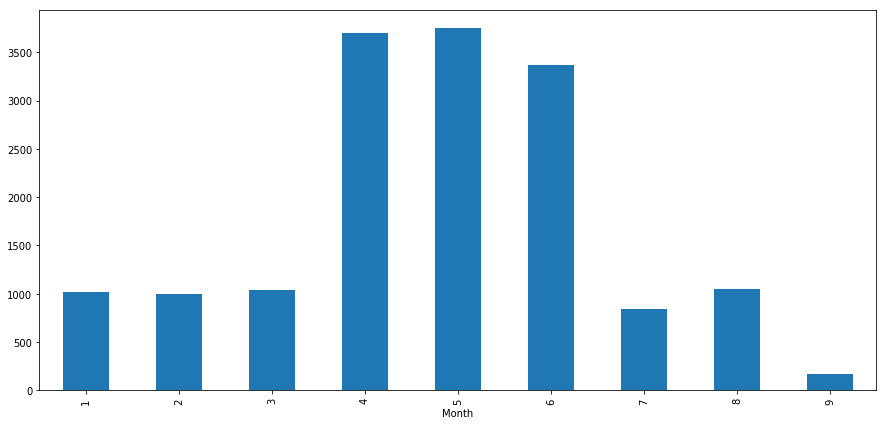

In [62]:
fig, ax = plt.subplots(figsize=(15,7))
train.groupby(['Month']).count()['ScreenName'].plot(kind='bar',ax=ax)

In [63]:
train.head()

,ScreenName,country,retweetcount,FavoriteCount,TweetHistoryid,Keyword,TweetFulltext,Hour,Month,Day
0,1970sBOY,"Brentwood, Essex, UK",0,0,155756248,Beer,Drinking @ButcombeBrewery Bitter or @MolesBrew...,19,5,Monday
1,1gastronomy,Switzerland,0,0,116790821,#Beer,#Catholic #easter2019 #sunday with #pastrami #...,17,4,Sunday
2,1gastronomy,Switzerland,0,0,138235306,#Beer,#fixbeer #fixtime #fix #beer #greekbeer @fixbe...,21,8,Thursday
3,80breakfasts,"Manila, Philippines",0,2,155581245,Beer,Won’t win any beauty contests but those aren’t...,21,8,Friday
6,agladman,South East London,0,0,155758898,Beer,@Shinybiscuit So far I've only had beer for te...,22,4,Thursday


In [64]:
train.dtypes

ScreenName        object
country           object
retweetcount       int64
FavoriteCount      int64
TweetHistoryid     int64
Keyword           object
TweetFulltext     object
Hour               int64
Month              int64
Day               object
dtype: object

In [65]:
train.drop(['Keyword'],axis=1,inplace=True)

In [66]:
from sklearn_pandas import DataFrameMapper
mapper = DataFrameMapper([
    (['retweetcount','FavoriteCount','TweetHistoryid','Hour','Month'], None),
    ('ScreenName',TfidfVectorizer()),('country',TfidfVectorizer()),('TweetFulltext',TfidfVectorizer()),('Day',TfidfVectorizer())
])
X=mapper.fit_transform(train)

In [67]:
X.shape

(15927, 42284)

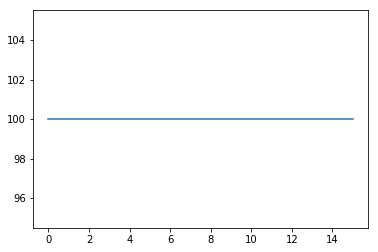

In [68]:
pca = PCA(n_components=16)
fit = pca.fit(X)
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

#PCA 16 components

In [69]:
pca = PCA(n_components=16)
fit = pca.fit_transform(X)

In [70]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(fit)
y_kmeans=kmeans.predict(fit)

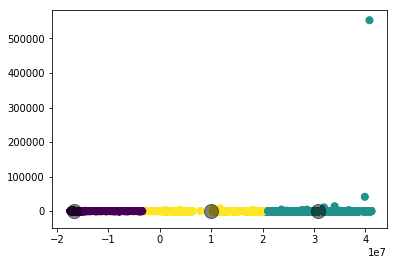

In [71]:
plt.scatter(fit[:, 0], fit[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [72]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(fit)
y_kmeans=kmeans.predict(fit)

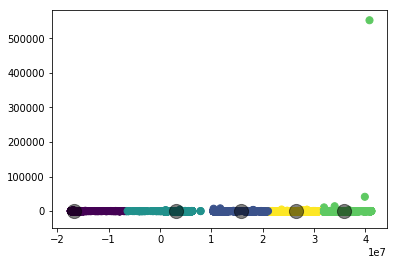

In [73]:
plt.scatter(fit[:, 0], fit[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

5 Clusters

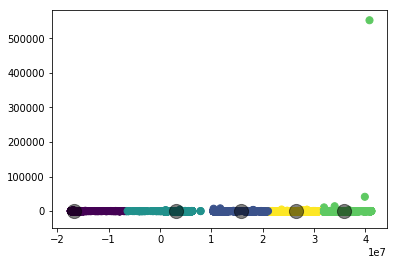

In [74]:
plt.scatter(fit[:, 0], fit[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [75]:
kmeans = KMeans(n_clusters=75)
kmeans.fit(fit)
y_kmeans=kmeans.predict(fit)

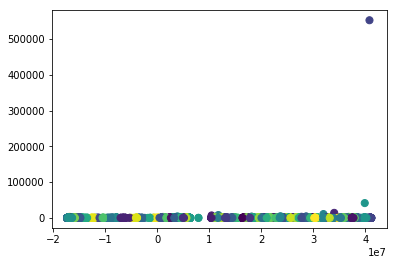

In [76]:
plt.scatter(fit[:, 0], fit[:, 1], c=y_kmeans, s=50, cmap='viridis')

#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [77]:
tsne = TSNE(n_components=3, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(fit)

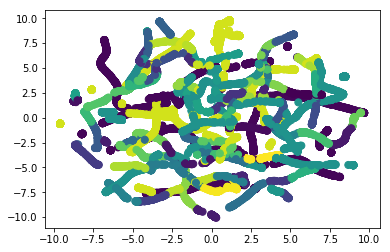

In [78]:
plt.scatter(tsne_pca_results[:, 0], tsne_pca_results[:, 1], c=y_kmeans, s=50, cmap='viridis')

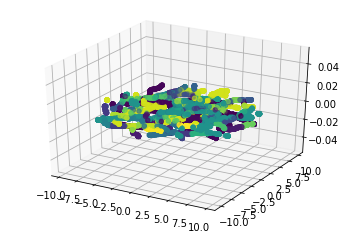

In [79]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*zip(*tsne_pca_results[:,:2]),c=y_kmeans)
plt.show()
#plt.scatter(*zip(*tsne_pca_results[:,:2]), c=y_kmeans)
#plt.scatter(*zip(*tsne_pca_results[:,:2]), c=y_kmeans, cmap='RdBu')

#PCA 100 components

In [80]:
pca = PCA(n_components=100)
fit100 = pca.fit_transform(X)

In [81]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(fit100)
y_kmeans=kmeans.predict(fit100)

In [82]:
kmeans = KMeans(n_clusters=80)
kmeans.fit(fit100)
y_kmeans=kmeans.predict(fit100)

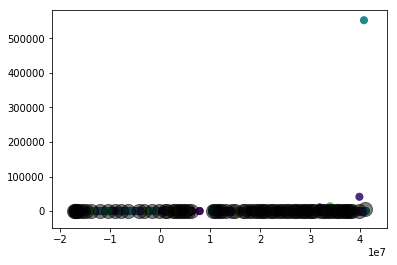

In [83]:
plt.scatter(fit100[:, 0], fit100[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

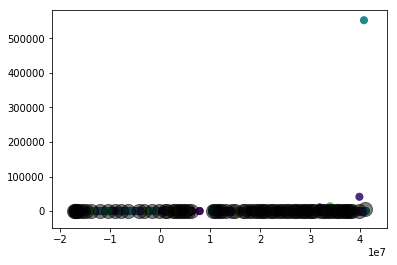

In [84]:
plt.scatter(fit100[:, 0], fit100[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [85]:
tsne = TSNE(n_components=3, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(fit100)

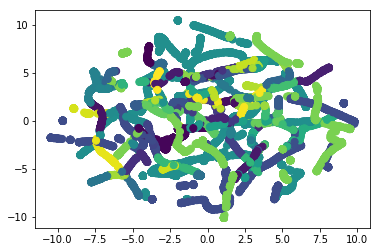

In [86]:
plt.scatter(tsne_pca_results[:, 0], tsne_pca_results[:, 1], c=y_kmeans, s=50, cmap='viridis')

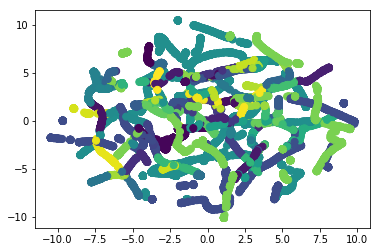

In [87]:
plt.scatter(tsne_pca_results[:, 0], tsne_pca_results[:, 1], c=y_kmeans, s=50, cmap='viridis')

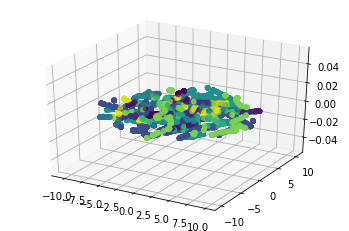

In [88]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*zip(*tsne_pca_results[:,:2]),c=y_kmeans)
plt.show()
#plt.scatter(*zip(*tsne_pca_results[:,:2]), c=y_kmeans)
#plt.scatter(*zip(*tsne_pca_results[:,:2]), c=y_kmeans, cmap='RdBu')

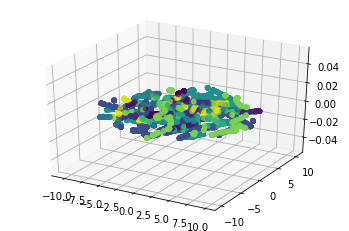

In [89]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*zip(*tsne_pca_results[:,:2]),c=y_kmeans)
plt.show()
#plt.scatter(*zip(*tsne_pca_results[:,:2]), c=y_kmeans)
#plt.scatter(*zip(*tsne_pca_results[:,:2]), c=y_kmeans, cmap='RdBu')

#PCA 200 components

In [90]:
pca = PCA(n_components=200)
fit200 = pca.fit_transform(X)

In [91]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(fit200)
y_kmeans=kmeans.predict(fit200)

In [92]:
kmeans = KMeans(n_clusters=165)
kmeans.fit(fit200)
y_kmeans=kmeans.predict(fit200)

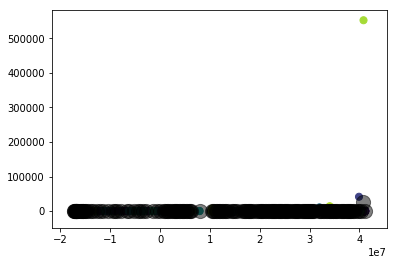

In [93]:
plt.scatter(fit200[:, 0], fit200[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

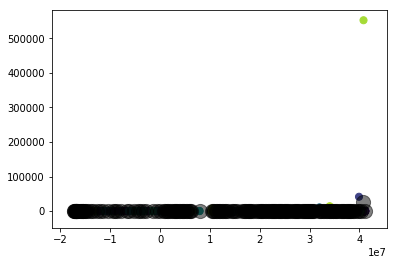

In [94]:
plt.scatter(fit200[:, 0], fit200[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [95]:
tsne = TSNE(n_components=3, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(fit200)

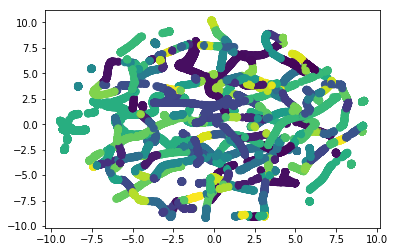

In [96]:
plt.scatter(tsne_pca_results[:, 0], tsne_pca_results[:, 1], c=y_kmeans, s=50, cmap='viridis')

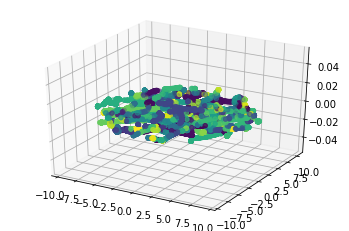

In [97]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*zip(*tsne_pca_results[:,:2]),c=y_kmeans)
plt.show()
#plt.scatter(*zip(*tsne_pca_results[:,:2]), c=y_kmeans)
#plt.scatter(*zip(*tsne_pca_results[:,:2]), c=y_kmeans, cmap='RdBu')

In [98]:
fit.shape

(15927, 16)

In [99]:
print(pca.explained_variance_ratio_)

[9.99999955e-01 4.52771435e-08 1.47113836e-10 1.22028731e-13
 4.81868777e-15 4.04757644e-16 3.84238774e-16 3.57604512e-16
 3.27121700e-16 2.96644812e-16 2.70141565e-16 2.38478614e-16
 2.24376787e-16 1.74160208e-16 1.56394983e-16 1.42789019e-16
 1.19337119e-16 1.05859956e-16 9.83537739e-17 8.48507322e-17
 7.83856380e-17 7.05163946e-17 6.87942314e-17 6.18147363e-17
 6.04003043e-17 5.73365415e-17 5.48548153e-17 5.20372640e-17
 5.12016218e-17 5.04526031e-17 5.02378965e-17 4.80535425e-17
 4.55141987e-17 4.48347346e-17 4.29058151e-17 4.25097452e-17
 4.22763660e-17 4.12642051e-17 4.05676673e-17 3.99023518e-17
 3.93139024e-17 3.84602503e-17 3.79541500e-17 3.75080363e-17
 3.63889339e-17 3.45365413e-17 3.33763289e-17 3.21652314e-17
 3.13580133e-17 3.08173000e-17 3.00709655e-17 2.88869270e-17
 2.84396198e-17 2.74441220e-17 2.70336511e-17 2.67951058e-17
 2.50389248e-17 2.40078388e-17 2.29451846e-17 2.23374418e-17
 2.17612060e-17 2.15189417e-17 2.04575148e-17 1.96492135e-17
 1.93704122e-17 1.892663

In [100]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(fit)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [101]:
train.head()

,ScreenName,country,retweetcount,FavoriteCount,TweetHistoryid,TweetFulltext,Hour,Month,Day
0,1970sBOY,"Brentwood, Essex, UK",0,0,155756248,Drinking @ButcombeBrewery Bitter or @MolesBrew...,19,5,Monday
1,1gastronomy,Switzerland,0,0,116790821,#Catholic #easter2019 #sunday with #pastrami #...,17,4,Sunday
2,1gastronomy,Switzerland,0,0,138235306,#fixbeer #fixtime #fix #beer #greekbeer @fixbe...,21,8,Thursday
3,80breakfasts,"Manila, Philippines",0,2,155581245,Won’t win any beauty contests but those aren’t...,21,8,Friday
6,agladman,South East London,0,0,155758898,@Shinybiscuit So far I've only had beer for te...,22,4,Thursday


In [102]:
train1=pd.DataFrame([['1963sDoT','India',1,3,1546112,'Drawing Beer',15,4,'Wednesday']],columns=['ScreenName','country','retweetcount','FavoriteCount','TweetHistoryid','TweetFulltext','Hour','Month','Day'])

In [103]:
tf=TfidfVectorizer().fit_transform(['1963sDoT','India','Drawing Beer','Wednesday'])


In [104]:
from sklearn_pandas import DataFrameMapper
mapper = DataFrameMapper([
    (['retweetcount','FavoriteCount','TweetHistoryid','Hour','Month'], None),
    ('ScreenName',TfidfVectorizer()),('country',TfidfVectorizer()),('TweetFulltext',TfidfVectorizer()),('Day',TfidfVectorizer())
])
Y=mapper.fit_transform(train1)


In [105]:
Y=mapper.transform(train1)

In [106]:
Y.shape

(1, 10)

In [107]:
fit = pca.transform(Y)

ValueError: operands could not be broadcast together with shapes (1,10) (42284,) 

In [108]:
y_kmeans=kmeans.predict(fit)

In [109]:
kmeans.labels_

array([0, 1, 2, ..., 0, 0, 0], dtype=int32)

In [110]:
pca = PCA(n_components=2)
fit = pca.fit_transform(X)

In [111]:
print(fit)

[[-1.67575823e+07  1.90848408e+01]
 [ 2.22078447e+07 -1.37455041e+02]
 [ 7.63359698e+05 -5.13038879e+01]
 ...
 [-1.71070053e+07  2.04886089e+01]
 [-1.71073453e+07  1.90058710e+03]
 [-1.71100953e+07  2.07802798e+01]]


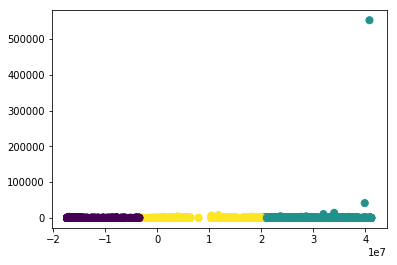

In [112]:
plt.scatter(fit[:, 0], fit[:, 1], c=y_kmeans, s=50, cmap='viridis')

#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [113]:
y_kmeans.shape

(15927,)

In [114]:
pred.shape

NameError: name 'pred' is not defined

In [115]:
tsne = TSNE(n_components=3, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(fit)

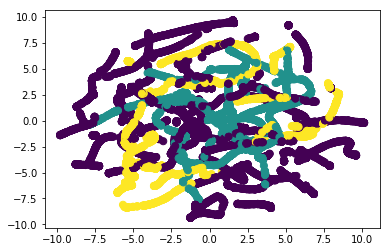

In [116]:
plt.scatter(tsne_pca_results[:, 0], tsne_pca_results[:, 1], c=y_kmeans, s=50, cmap='viridis')

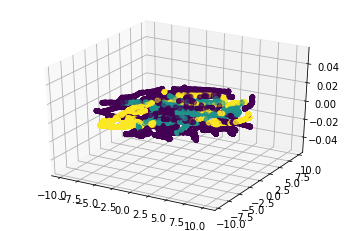

In [117]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*zip(*tsne_pca_results[:,:2]),c=y_kmeans)
plt.show()
#plt.scatter(*zip(*tsne_pca_results[:,:2]), c=y_kmeans)
#plt.scatter(*zip(*tsne_pca_results[:,:2]), c=y_kmeans, cmap='RdBu')

In [118]:

import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K

from time import time

from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec

from scipy.misc import imread
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, normalized_mutual_info_score

Using TensorFlow backend.


In [119]:
# this is our input placeholder
input_img = Input(shape=(42284,))

# "encoded" is the encoded representation of the input
encoded = Dense(500, activation='relu')(input_img)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(2000, activation='relu')(encoded)
encoded = Dense(10, activation='sigmoid')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(2000, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(42284)(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [120]:
split_size = int(X.shape[0]*0.7)

train_x, val_x = X[:split_size], X[split_size:]
train_y, val_y = X[:split_size], X[split_size:]

In [121]:
encoder = Model(input_img, encoded)
autoencoder.compile(optimizer='adam', loss='mse')


In [122]:
train_history = autoencoder.fit(train_x, train_x, epochs=10, batch_size=2048, validation_data=(val_x, val_x))

Train on 11148 samples, validate on 4779 samples
Epoch 1/10
11148/11148 [==============================] - 46s 4ms/step - loss: 465024840284.0388 - val_loss: 471694048848.0302
Epoch 2/10
11148/11148 [==============================] - 44s 4ms/step - loss: 465024854357.7007 - val_loss: 471694034805.5811
Epoch 3/10
11148/11148 [==============================] - 44s 4ms/step - loss: 465024747494.2806 - val_loss: 471693838197.5811
Epoch 4/10
11148/11148 [==============================] - 44s 4ms/step - loss: 465024543349.7581 - val_loss: 471693426249.1735
Epoch 5/10
11148/11148 [==============================] - 44s 4ms/step - loss: 465023958111.1618 - val_loss: 471692415124.2754
Epoch 6/10
11148/11148 [==============================] - 44s 4ms/step - loss: 465022558740.0244 - val_loss: 471690130730.4792
Epoch 7/10
11148/11148 [==============================] - 45s 4ms/step - loss: 465019532820.3918 - val_loss: 471685707043.6225
Epoch 8/10
11148/11148 [==============================] - 45s 

In [123]:
pred_auto_train = encoder.predict(train_x)
pred_auto = encoder.predict(val_x)

In [124]:
km = KMeans(n_jobs=-1, n_clusters=10, n_init=20)
km.fit(pred_auto_train)
pred = km.predict(pred_auto)

/opt/conda/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:972: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)


In [125]:
fit.shape

(15927, 2)

ValueError: 'c' argument has 4779 elements, which is not acceptable for use with 'x' with size 15927, 'y' with size 15927.

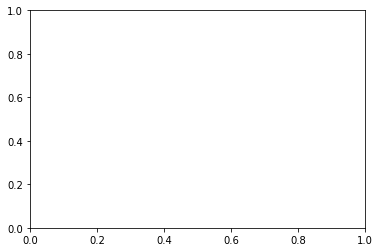

In [126]:
plt.scatter(fit[:, 0], fit[:, 1], c=pred
            , s=50, cmap='viridis')

